In [1]:
import os

import itertools
import collections

import pandas as pd
import matplotlib.pyplot as plt

import community
import networkx as nx

In [2]:
df_allegations = pd.read_csv('results_officer_allegations.csv')

In [3]:
df_allegations.head()

,officer_id,final_outcome,allegation_name
0,1,No Action Taken,Search Of Premise Without Warrant
1,1,No Action Taken,Unnecessary Display Of Weapon / Off Duty
2,1,No Action Taken,Seat Belts
3,1,No Action Taken,Reports
4,1,No Action Taken,Inadequate / Failure To Provide Service


In [4]:
df_officer_allegations = df_allegations[['officer_id', 'allegation_name']]

In [5]:
df_officer_allegations = df_officer_allegations.groupby('officer_id')['allegation_name'].apply(list)

In [6]:
def generate_edges(list_of_alleg):
    return [(list_of_alleg[i], list_of_alleg[i+1])for i in range(0,len(list_of_alleg)-1)]

In [7]:
edges = []

for row in df_officer_allegations:
    count = len(row)
    if count > 1:
        edges.extend(generate_edges(row))

In [8]:
edges

[('Search Of Premise Without Warrant',
  'Unnecessary Display Of Weapon / Off Duty'),
 ('Unnecessary Display Of Weapon / Off Duty', 'Seat Belts'),
 ('Seat Belts', 'Reports'),
 ('Reports', 'Inadequate / Failure To Provide Service'),
 ('Inadequate / Failure To Provide Service',
  'Inadequate / Failure To Provide Service'),
 ('Improper Search Of Person', 'Improper Search Of Person'),
 ('Improper Search Of Person', 'Illegal Arrest / False Arrest'),
 ('Illegal Arrest / False Arrest', 'Excessive Force / On Duty - Injury'),
 ('Excessive Force / On Duty - Injury',
  'Excessive Force / On Duty - No Injury'),
 ('Excessive Force / On Duty - No Injury', 'Gang Affiliation'),
 ('Gang Affiliation', 'Inventory Procedures'),
 ('Inventory Procedures', 'Inventory Procedures'),
 ('Improper Search Of Vehicle', 'Search - Person / Property'),
 ('Search - Person / Property', 'Prisoners Property'),
 ('Prisoners Property', 'Excessive Force / On Duty - Injury'),
 ('Excessive Force / On Duty - Injury', 'Neglect O

In [9]:
len(edges), len(set(edges))

(187286, 4449)

In [10]:
edge_counts = collections.Counter(edges)

In [11]:
len(edge_counts)

4449

In [12]:
df_edges = pd.DataFrame.from_dict(edge_counts, columns=['Edge Frequency'], orient='index')

In [13]:
df_edges.head()

,Edge Frequency
"(Search Of Premise Without Warrant, Unnecessary Display Of Weapon / Off Duty)",14
"(Unnecessary Display Of Weapon / Off Duty, Seat Belts)",3
"(Seat Belts, Reports)",31
"(Reports, Inadequate / Failure To Provide Service)",2515
"(Inadequate / Failure To Provide Service, Inadequate / Failure To Provide Service)",8263


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbc816e4e0>]], dtype=object)

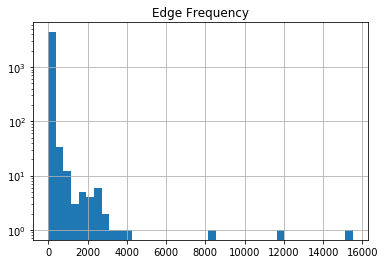

In [14]:
df_edges.hist(bins=40, log=True)

In [15]:
G = nx.Graph()

In [16]:
nodes = dict()

for row in set(edges):
    if row[0] not in nodes:
        nodes[row[0]] = len(nodes)
        G.add_node(nodes[row[0]], name=row[0])
    if row[1] not in nodes:
        nodes[row[1]] = len(nodes)
        G.add_node(nodes[row[1]], name=row[1])
    G.add_edge(nodes[row[0]], nodes[row[1]], weight=float(edge_counts[row]))

In [17]:
len(nodes)

170

In [18]:
len(G.edges)

3714

In [19]:
partition = community.best_partition(G, weight='weight')

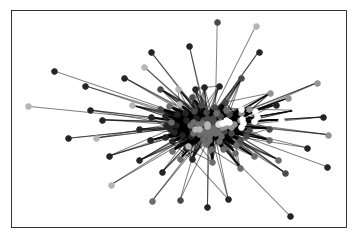

In [20]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [21]:
community.modularity(partition, G)

0.5459297363855401

In [22]:
len(partition.values())

170

In [23]:
communities = { i : [] for i in range(0,10) }

[communities[community].append(G.node[node]['name']) for node, community in enumerate(partition.values())]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [24]:
communities

{0: ['Miscellaneous',
  'Choked',
  'Dragged',
  'Push/Pull/Grab',
  'Positive Drug Screen - Other Physical Exam',
  'Firearm Discharge With Hits / On Duty',
  'Traffic Pursuit',
  'Failure To Ensure - Civil Rights',
  'Positive Drug Screen - Originated From Complaint',
  'Inventory Procedures',
  'Properly Direct Subordinate',
  'Just Cause',
  'Positive Drug Screen - Recruit',
  'State Civil Suit',
  'Federal Civil Suit',
  'Fail To Obtain A Complaint Register Number',
  'Closed Hand Strike (Punch)',
  'Forwarded To O.E.C.',
  'Conduct An Improper / Inadequate Investigation',
  'Vehicle Licensing - State',
  'Initiate Proper Action',
  'Properly Review / Inspect Subordinate',
  'Kicked',
  'No Injury',
  'Firearm Discharge With Hits - Handgun',
  'Use / Abuse Drugs / Controlled Substance - On Duty',
  'Positive Drug Screen - Promotion Physical',
  'Refusal Of Direct Order To Provide Drug Screen Specimen',
  'Vehicle',
  'Harassment',
  'Taser (Probe Discharge)',
  'Unjustified Pointi